In [6]:
import numpy as np
from numpy.random import randn
import matplotlib.pyplot as plt

In [7]:
## PARAMETERS
## note: you'll have a bit less than N_points as some are cut out of the [0,10] time interval
N_points = 10000
N_rebirth = N_points * 0.3
## not implemented
z_max = 10

In [8]:
def generate_rebirth(n_pts, loc, width):
    x,y=loc
    widthx,widthy=width
    x_axis = widthx*np.random.randn(n_pts,)+x
    y_axis = widthy*np.random.randn(n_pts,)+y
    t_axis_bottom = 3*np.random.randn(n_pts//2,)-2
    t_axis_top = 4*np.random.randn(n_pts//2, )+(11)
    t_axis = np.concatenate((t_axis_top, t_axis_bottom), axis=0)
    cluster_rebirth = np.array([
        x_axis,
        y_axis,
        t_axis,
    ])
    return cluster_rebirth.T

def generate_consistent(n_pts, loc, width):
    x,y=loc
    widthx,widthy=width
    x_axis = widthx * np.random.randn(n_pts,) + x
    y_axis = widthy * np.random.randn(n_pts,) + y
    t_axis = 10*np.random.rand(n_pts,)

    cluster_consistent = np.array([
        x_axis,
        y_axis,
        t_axis,
    ])
    return cluster_consistent.T
    

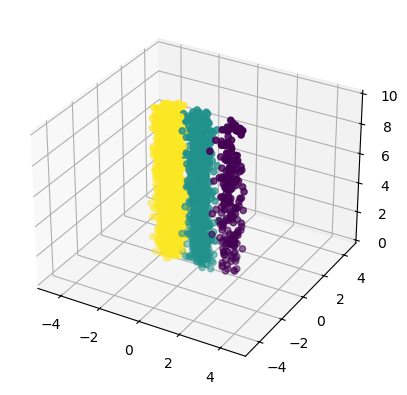

In [16]:
c1 = generate_consistent(500, (5,0), (0.5,0.6))
c3 = generate_consistent(500, (0,5), (0.5,0.6))
c4 = generate_consistent(1800, (-1,0), (0.3,0.2))
c2 = generate_consistent(1800, (0,-1), (0.3,0.2))
intended_clusters = [0]*500 + [1]*1800


d1 = generate_consistent(200, (1.5,0), (0.3,0.2))
d2 = generate_consistent(600, (0,0), (0.3,0.2))
d3 = generate_consistent(1800, (-1.5,0), (0.3,0.2))

cluster_merge = np.concatenate((c1,c2),axis=0)
cluster_merge = np.squeeze(cluster_merge)

in_set = ((cluster_merge[:,2]<=5) ^ (cluster_merge[:,2] >= 6)).nonzero()
cluster_merge = cluster_merge[in_set] 
intended_clusters = list(np.array(intended_clusters)[in_set]) + [2]*500 + [3]*1800
cluster_merge = np.squeeze(cluster_merge)
cluster_merge = np.concatenate((cluster_merge,c3,c4),axis=0)
cluster_merge = np.concatenate((d1,d2,d3),axis=0)
intended_clusters = [0]*200 + [1]*600 + [2]*1800
cluster_merge = np.squeeze(cluster_merge)


fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(cluster_merge[:,0],cluster_merge[:,1],cluster_merge[:,2],c=intended_clusters)
ax.set_ylim(-5,5)
ax.set_xlim(-5,5)
ax.set_zlim(0,10)
plt.show()
np.save("./density_test_data.npy",cluster_merge)

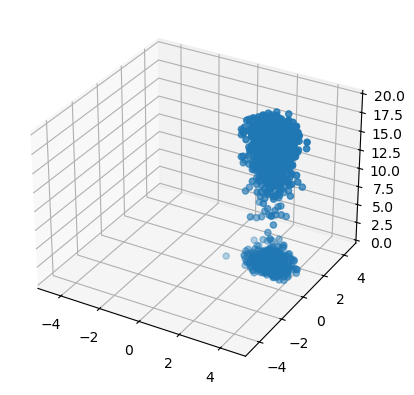

1779

In [11]:
# A topic dying and being reborn
intended_clusters = []

x_axis = .5*np.random.randn(5284, )+3
y_axis = .3*np.random.randn(5284, )+1
t_axis_bottom = 2*np.random.randn(5284//2,)-2
t_axis_top = 4*np.random.randn(5284//2, )+(20)
t_axis = np.concatenate((t_axis_top, t_axis_bottom), axis=0)
cluster_rebirth = np.array([
    x_axis,
    y_axis,
    t_axis,
])
in_set = ((cluster_rebirth[2]<=z_max) & (cluster_rebirth[2] >= 0)).nonzero()
cluster_rebirth = cluster_rebirth[:,in_set] 
cluster_rebirth = cluster_rebirth[:,0,:]
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(cluster_rebirth[0], cluster_rebirth[1], cluster_rebirth[2])
ax.set_ylim(-5,5)
ax.set_xlim(-5,5)
ax.set_zlim(0,z_max)
plt.show()

intended_clusters += [0]*np.size(cluster_rebirth[2])
len(intended_clusters)

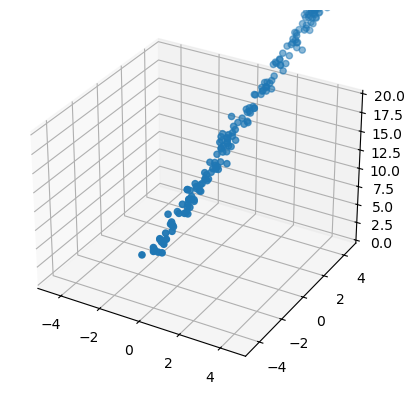

3179

In [16]:
# A very low density topic drifting over time.

x_axis = .2*np.random.randn(200,)-2
t_axis = 20*np.random.rand(200,)
y_axis = t_axis + .5*np.random.randn(200,)-1

cluster_drift = np.array([
    x_axis,
    y_axis,
    t_axis,
])
in_set = ((cluster_drift[2]<=z_max) & (cluster_drift[2] >= 0)).nonzero()
cluster_drift = cluster_drift[:,in_set] 

cluster_drift = cluster_drift[:,0,:]
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(cluster_drift[0], cluster_drift[1], cluster_drift[2])
ax.set_ylim(-5,5)
ax.set_xlim(-5,5)
ax.set_zlim(0,z_max)
plt.show()

intended_clusters += [1]*np.size(cluster_drift[2])
len(intended_clusters)

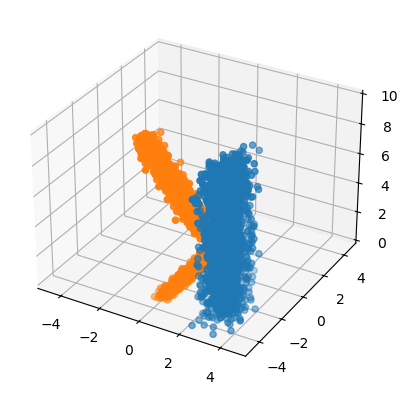

6404

In [34]:
# Two topics merging and then splitting.
x_axis = .4 * np.random.randn(1426,) + 3
y_axis = .7 * np.random.randn(1426,) - 3
t_axis = 10*np.random.rand(1426,)

cluster_merge1= np.array([
    x_axis,
    y_axis,
    t_axis,
])
in_set = ((cluster_merge1[2]<=10) & (cluster_merge1[2] >= 0)).nonzero()
cluster_merge1 = cluster_merge1[:,in_set] 

intended_clusters += [2]*np.size(cluster_merge1[2])

y_axis = .3*np.random.randn(2630,)-3

t_axis_bottom = 5*np.random.rand(1315,)
x_axis_bottom = (3/5)*t_axis_bottom + .15*np.random.randn(1315,)

t_axis_top = 5*np.random.rand(1315,)+5
x_axis_top = 5-(3/5)*t_axis_top + .15*np.random.randn(1315,) 

x_axis = np.concatenate((x_axis_top, x_axis_bottom), axis=0)
t_axis = np.concatenate((t_axis_top, t_axis_bottom), axis=0)
cluster_merge2 = np.array([
    x_axis,
    y_axis,
    t_axis,
])
in_set = ((cluster_merge2[2]<=10) & (cluster_merge2[2] >= 0)).nonzero()
cluster_merge2 = cluster_merge2[:,in_set] 
cluster_merge1 = cluster_merge1[:,0,:]
cluster_merge2 = cluster_merge2[:,0,:]

intended_clusters += [3]*np.size(cluster_merge2[2])

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(cluster_merge1[0], cluster_merge1[1], cluster_merge1[2])
ax.scatter(cluster_merge2[0], cluster_merge2[1], cluster_merge2[2])
ax.set_ylim(-5,5)
ax.set_xlim(-5,5)
ax.set_zlim(0,10)
plt.show()
len(intended_clusters)

In [35]:
# consistent low density cluster

x_axis = 1 * np.random.randn(220,) - 4
y_axis = 1 * np.random.randn(220,) - 4
t_axis = 10*np.random.rand(220,)

cluster_lowdensity= np.array([
    x_axis,
    y_axis,
    t_axis,
])
in_set = ((cluster_lowdensity[2]<=10) & (cluster_lowdensity[2] >= 0)).nonzero()
cluster_lowdensity = cluster_lowdensity[:,in_set] 

cluster_lowdensity = cluster_lowdensity[:,0,:]
intended_clusters += [4]*np.size(cluster_lowdensity[2])


In [36]:
# Random noise points
x_axis = 10 * np.random.rand(100,)-5
y_axis = 10 * np.random.rand(100,)-5
t_axis = 10 * np.random.rand(100,)

outliers = np.array([
    x_axis,
    y_axis,
    t_axis,
])

intended_clusters += [-1]*np.size(t_axis)


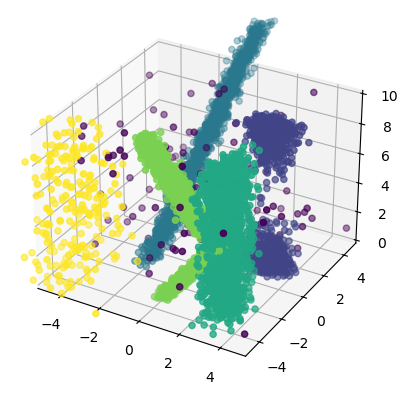

In [41]:

# Plot everything together 
bespoke_data = np.concatenate((
    cluster_rebirth,
    cluster_drift,
    cluster_merge1,
    cluster_merge2,
    cluster_lowdensity,
    outliers),
                              axis = 1)


fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(bespoke_data[0], bespoke_data[1], bespoke_data[2], c=intended_clusters)
ax.set_ylim(-5,5)
ax.set_xlim(-5,5)
ax.set_zlim(0,10)
plt.show()


In [54]:
# Add labels and then save to file
bespoke_data_labelled = np.concatenate((bespoke_data, np.array([intended_clusters])), axis=0)
np.save("./density_test_data.npy",bespoke_data_labelled)

In [51]:
np.shape(np.array([intended_clusters]))

(1, 6724)

In [49]:
np.shape(bespoke_data)

(3, 6724)